In [1]:
## https://github.com/youssefHosni/Time-Series-With-Python/blob/main/Arima%20Models%20in%20Python/ARIMA_Models_In%C2%A0Python.ipynb

# import the important libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

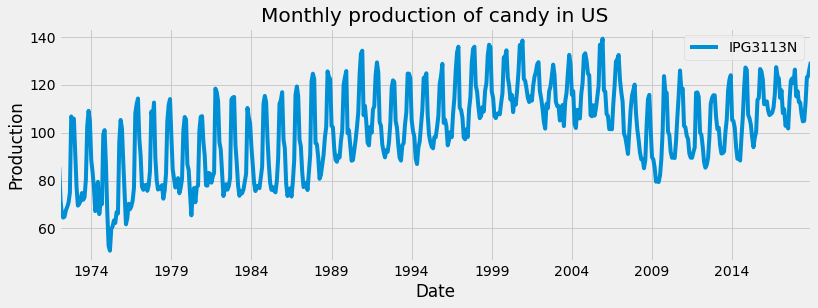

In [2]:
# Load in the time series
candy = pd.read_csv(r'./data/candy_production.csv', 
            index_col='date',
            parse_dates=True)
# change the plot style into fivethirtyeight 
plt.style.use('fivethirtyeight')

# Plot and show the time series on axis ax1
fig, ax1 = plt.subplots()
candy.plot(ax=ax1, figsize=(12, 4))
plt.title('Monthly production of candy in US')
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()

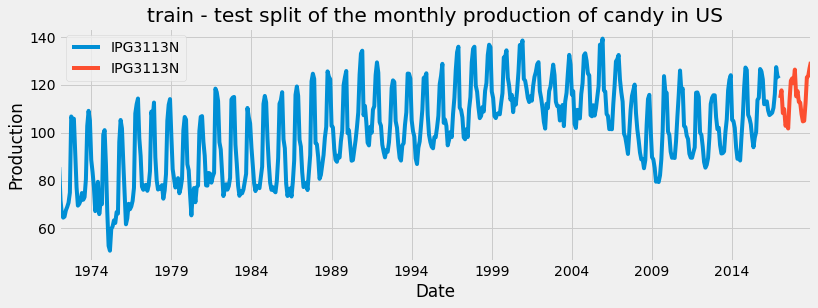

In [3]:
# Split the data into a train and test set
candy_train = candy.loc[:'2016']
candy_test = candy.loc['2017':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax, figsize=(12,4))
candy_test.plot(ax=ax)
plt.title('train - test split of the monthly production of candy in US')
plt.xlabel('Date')
plt.ylabel('Production')
plt.show()

In [4]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(candy)

output = pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"], columns=['value'])
output['value']['Test Statistic Value'] = result[0]
output['value']['p-value'] = result[1]
output['value']['Lags Used'] = result[2]
output['value']['Number of Observations Used'] = result[3]
output['value']['Critical Value(1%)'] = result[4]['1%']
output['value']['Critical Value(5%)'] = result[4]['5%']
output['value']['Critical Value(10%)'] = result[4]['10%']
output

,value
Test Statistic Value,-1.776015
p-value,0.392433
Lags Used,14
Number of Observations Used,549
Critical Value(1%),-3.442317
Critical Value(5%),-2.866819
Critical Value(10%),-2.569582


In [5]:
result = adfuller(candy.diff().dropna())

output = pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"], columns=['value'])
output['value']['Test Statistic Value'] = result[0]
output['value']['p-value'] = result[1]
output['value']['Lags Used'] = result[2]
output['value']['Number of Observations Used'] = result[3]
output['value']['Critical Value(1%)'] = result[4]['1%']
output['value']['Critical Value(5%)'] = result[4]['5%']
output['value']['Critical Value(10%)'] = result[4]['10%']
output

,value
Test Statistic Value,-6.175912
p-value,0.0
Lags Used,13
Number of Observations Used,549
Critical Value(1%),-3.442317
Critical Value(5%),-2.866819
Critical Value(10%),-2.569582


/usr/local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


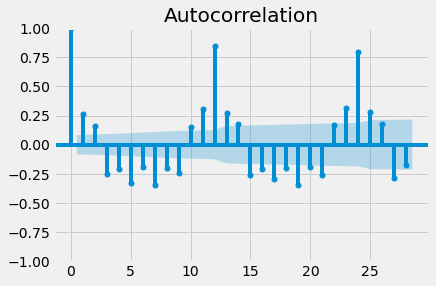

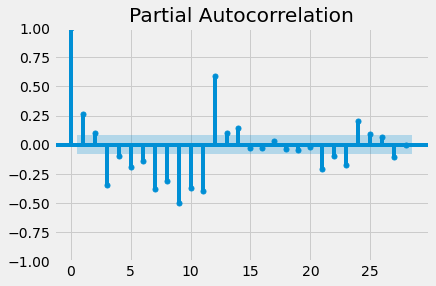

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

candy_diff = candy.diff().dropna()

acf_original = plot_acf(candy_diff)
pacf_original = plot_pacf(candy_diff)

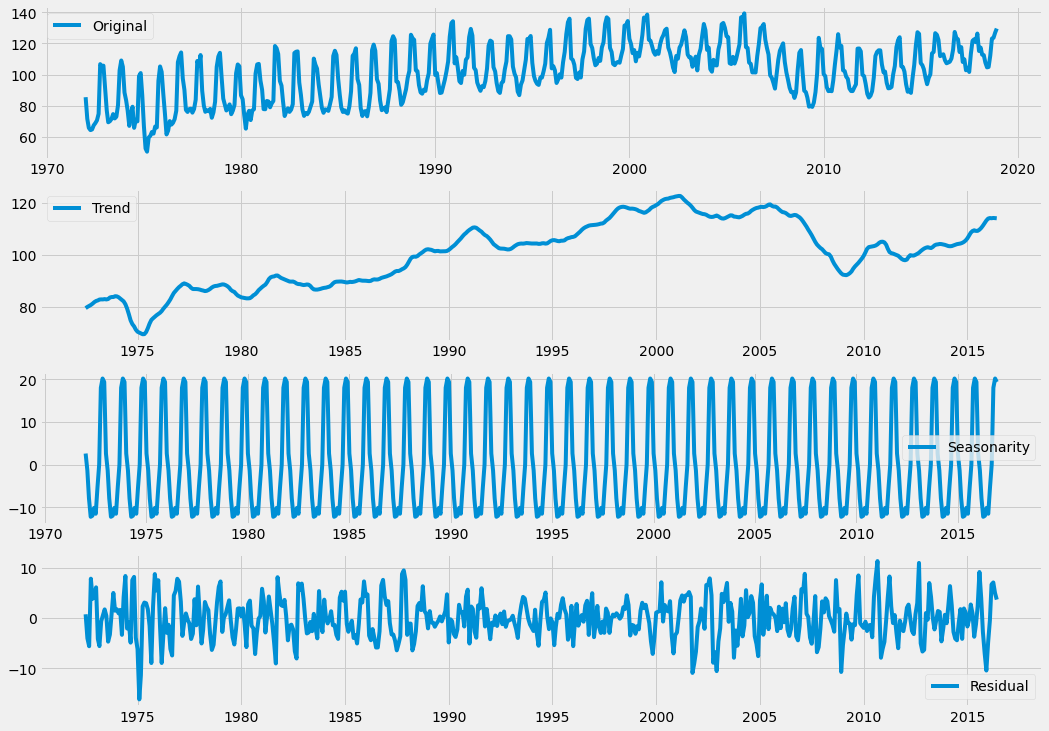

In [7]:
# 看起来是季节性的
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(candy_train)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16, 12))
plt.subplot(411)
plt.plot(candy, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonarity')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

In [8]:
# print(trend.fillna(0))

result = adfuller(trend.diff().dropna())

output = pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"], columns=['value'])
output['value']['Test Statistic Value'] = result[0]
output['value']['p-value'] = result[1]
output['value']['Lags Used'] = result[2]
output['value']['Number of Observations Used'] = result[3]
output['value']['Critical Value(1%)'] = result[4]['1%']
output['value']['Critical Value(5%)'] = result[4]['5%']
output['value']['Critical Value(10%)'] = result[4]['10%']
output



,value
Test Statistic Value,-5.375183
p-value,0.000004
Lags Used,19
Number of Observations Used,507
Critical Value(1%),-3.443314
Critical Value(5%),-2.867258
Critical Value(10%),-2.569815


date
1972-08-01    0.457487
1972-09-01    0.374121
1972-10-01    0.386476
1972-11-01    0.515282
1972-12-01    0.577608
                ...   
2016-02-01    0.201144
2016-03-01   -0.070853
2016-04-01    0.096661
2016-05-01   -0.048699
2016-06-01   -0.062913
Name: trend, Length: 527, dtype: float64


<AxesSubplot:xlabel='date'>

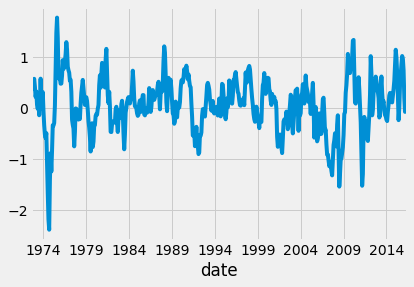

In [9]:
trend_data = pd.Series(trend.diff().dropna())
# trend_data.index = pd.Index(trend['date'])
# trend_data.plot()
print(trend_data)
# trend_data.index = pd.Index(trend_data['date'])
trend_data.plot()

In [10]:
import statsmodels.api as sm

trend_df = trend_data.to_frame(name='value')
residual_df = residual.to_frame(name='value')

trend_evaluate = sm.tsa.arma_order_select_ic(trend_df, ic=['aic', 'bic'], max_ar=4,
                                            max_ma=4)
print('trend AIC', trend_evaluate.aic_min_order)
print('trend BIC', trend_evaluate.bic_min_order)

residual_evaluate = sm.tsa.arma_order_select_ic(residual_df, ic=['aic', 'bic'], max_ar=4,
                                            max_ma=4)
print('residual AIC', residual_evaluate.aic_min_order)
print('residual BIC', residual_evaluate.bic_min_order)

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihoo

trend AIC (3, 4)
trend BIC (3, 4)


/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihoo

residual AIC (4, 4)
residual BIC (4, 3)


/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### 分解数据，针对 trend 和 residual 做 arima 分析试试

In [11]:
decomposition = seasonal_decompose(candy_train)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

trend = trend.dropna()
seasonal = seasonal.dropna()
residual = residual.dropna()

trend_df = trend.to_frame(name='value')
residual_df = residual.to_frame(name='value')
print(trend_df)
print(residual_df)

                 value
date                  
1972-07-01   79.643678
1972-08-01   80.101165
1972-09-01   80.475286
1972-10-01   80.861762
1972-11-01   81.377044
...                ...
2016-02-01  114.268848
2016-03-01  114.197996
2016-04-01  114.294656
2016-05-01  114.245958
2016-06-01  114.183044

[528 rows x 1 columns]
               value
date                
1972-07-01  0.785621
1972-08-01 -3.994006
1972-09-01 -5.588235
1972-10-01  7.889069
1972-11-01  3.877852
...              ...
2016-02-01 -0.428766
2016-03-01  6.746301
2016-04-01  7.138718
2016-05-01  5.044489
2016-06-01  3.717141

[528 rows x 1 columns]


In [12]:
# 定义diff函数，后续需要用
from statsmodels.tsa.stattools import adfuller as ADF

def printAdfResult(title, result):
  output = pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"], columns=['value'])
  output['value']['Test Statistic Value'] = result[0]
  output['value']['p-value'] = result[1]
  output['value']['Lags Used'] = result[2]
  output['value']['Number of Observations Used'] = result[3]
  output['value']['Critical Value(1%)'] = result[4]['1%']
  output['value']['Critical Value(5%)'] = result[4]['5%']
  output['value']['Critical Value(10%)'] = result[4]['10%']
  print('result for ', title)
  print(output)
    
def diff(timeseries):
  timeseries_diff1 = timeseries.diff(1)
  timeseries_diff2 = timeseries_diff1.diff(1)

  timeseries_diff1 = timeseries_diff1.fillna(0)
  timeseries_diff2 = timeseries_diff2.fillna(0)

  timeseries_adf = ADF(timeseries['value'].tolist())
  timeseries_diff1_adf = ADF(timeseries_diff1['value'].tolist())
  timeseries_diff2_adf = ADF(timeseries_diff2['value'].tolist())
  
  printAdfResult('timeseries_adf', timeseries_adf)
  printAdfResult('timeseries_diff1_adf', timeseries_diff1_adf)
  printAdfResult('timeseries_diff2_adf', timeseries_diff2_adf)

  plt.figure(figsize=(12, 8))
  plt.plot(timeseries, label='Original', color='blue')
  plt.plot(timeseries_diff1, label='Diff1', color='red')
  plt.plot(timeseries_diff2, label='Diff2', color='purple')
  plt.legend(loc='best')
  plt.show()

result for  timeseries_adf
                                value
Test Statistic Value        -1.562627
p-value                      0.502335
Lags Used                          19
Number of Observations Used       508
Critical Value(1%)          -3.443288
Critical Value(5%)          -2.867246
Critical Value(10%)         -2.569809
result for  timeseries_diff1_adf
                                value
Test Statistic Value          -5.3357
p-value                      0.000005
Lags Used                          19
Number of Observations Used       508
Critical Value(1%)          -3.443288
Critical Value(5%)          -2.867246
Critical Value(10%)         -2.569809
result for  timeseries_diff2_adf
                                value
Test Statistic Value        -7.012632
p-value                           0.0
Lags Used                          19
Number of Observations Used       508
Critical Value(1%)          -3.443288
Critical Value(5%)          -2.867246
Critical Value(10%)         -2.56

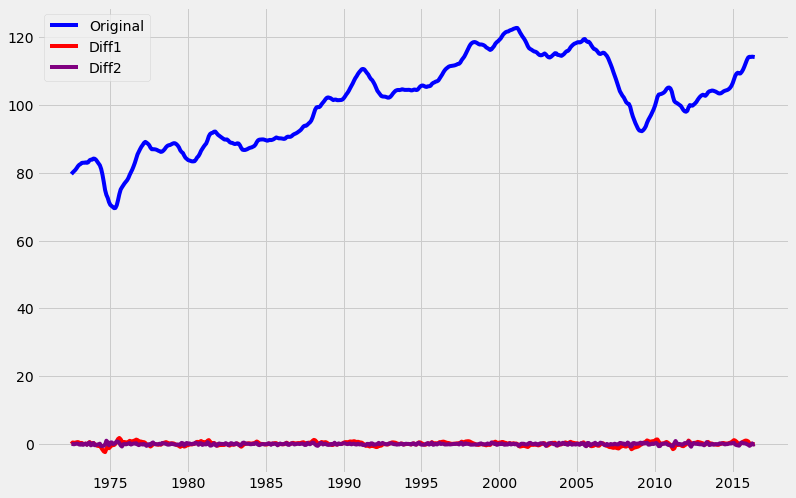

result for  timeseries_adf
                                value
Test Statistic Value        -8.259396
p-value                           0.0
Lags Used                          19
Number of Observations Used       508
Critical Value(1%)          -3.443288
Critical Value(5%)          -2.867246
Critical Value(10%)         -2.569809
result for  timeseries_diff1_adf
                                 value
Test Statistic Value        -13.647483
p-value                            0.0
Lags Used                           15
Number of Observations Used        512
Critical Value(1%)           -3.443187
Critical Value(5%)           -2.867202
Critical Value(10%)          -2.569785
result for  timeseries_diff2_adf
                                 value
Test Statistic Value        -14.114405
p-value                            0.0
Lags Used                           18
Number of Observations Used        509
Critical Value(1%)           -3.443263
Critical Value(5%)           -2.867235
Critical Value(10%

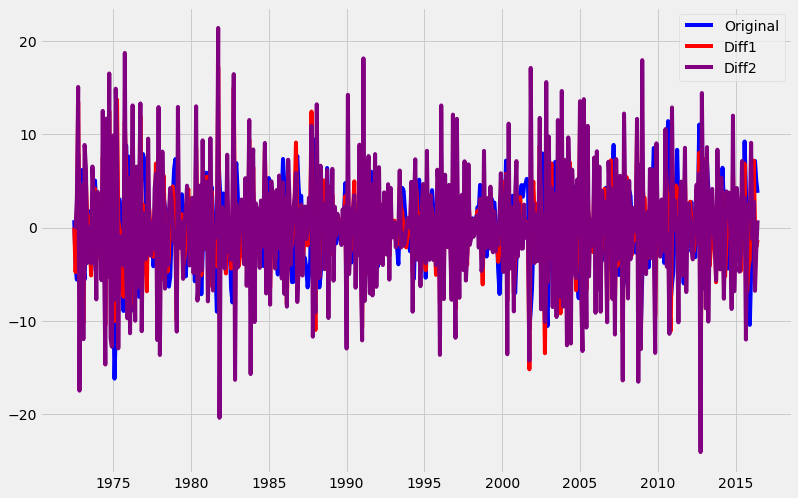

In [13]:
diff(trend_df)
diff(residual_df)

In [14]:
### 针对 trend residual 做 acf pacf

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def autocorrelation(timeseries, lags):
  fig = plt.figure(figsize=(12, 8))
  ax1 = fig.add_subplot(211)
  plot_acf(timeseries, lags=lags, ax=ax1)
  ax2 = fig.add_subplot(212)
  plot_pacf(timeseries, lags=lags, ax=ax2)
  plt.show()

/usr/local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


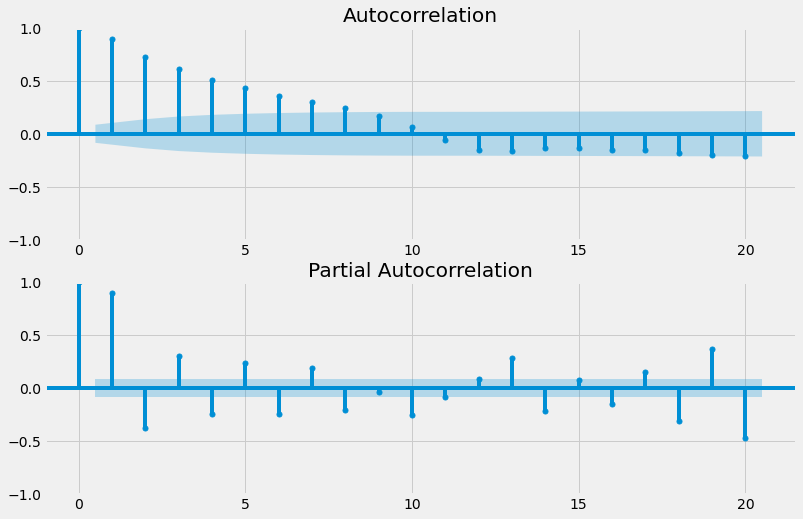

/usr/local/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


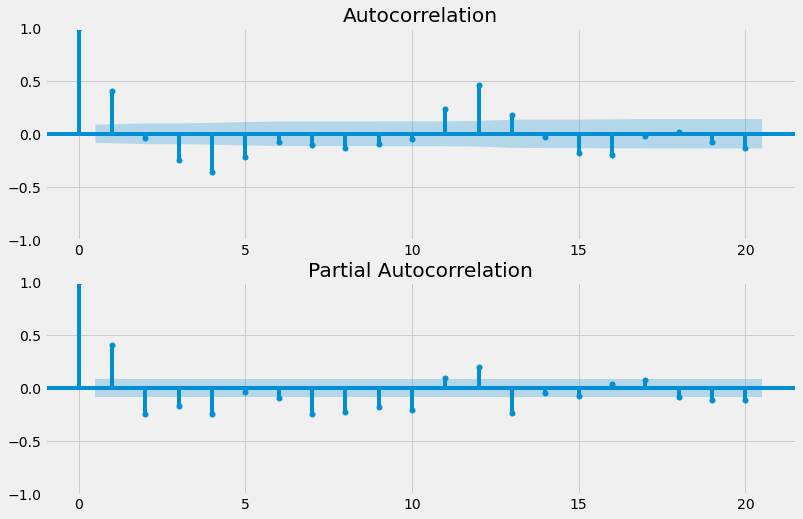

In [15]:
autocorrelation(trend_df.diff().dropna(), 20)
autocorrelation(residual_df, 20)

In [16]:
### AIC

trend_evaluate = sm.tsa.arma_order_select_ic(trend_df, ic=['aic', 'bic'], max_ar=8,
                                            max_ma=8)
print('trend AIC', trend_evaluate.aic_min_order)
print('trend BIC', trend_evaluate.bic_min_order)


/usr/local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihoo

/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimiz

trend AIC (8, 8)
trend BIC (8, 8)


/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
### AIC

trend_evaluate = sm.tsa.arma_order_select_ic(residual_df, ic=['aic', 'bic'], max_ar=8,
                                            max_ma=8)
print('trend AIC', trend_evaluate.aic_min_order)
print('trend BIC', trend_evaluate.bic_min_order)

/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihoo

/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimiz

trend AIC (8, 7)
trend BIC (6, 6)


/usr/local/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


# 开始拟合训练

In [18]:
def ARIMA_Model(timeseries, order):
  model = sm.tsa.ARIMA(timeseries, order=order)
  return model.fit()

# Split the data into a train and test set
candy_train = candy.loc[:'2016']
candy_test = candy.loc['2017':]

print(candy_train)
print(candy_test)

decomposition = seasonal_decompose(candy_train)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid



trend_df = trend.to_frame(name='value')
residual_df = residual.to_frame(name='value')
seasonal_df = seasonal.to_frame(name='value')

trend = trend_df.dropna()
seasonal = seasonal_df.dropna()
residual = residual_df.dropna()

print(seasonal)

              IPG3113N
date                  
1972-01-01   85.598809
1972-02-01   71.741404
1972-03-01   65.948809
1972-04-01   64.490724
1972-05-01   64.933842
...                ...
2016-08-01  110.411130
2016-09-01  116.116339
2016-10-01  127.385243
2016-11-01  123.605806
2016-12-01  122.692205

[540 rows x 1 columns]
              IPG3113N
date                  
2017-01-01  114.517938
2017-02-01  117.693169
2017-03-01  108.170772
2017-04-01  109.863949
2017-05-01  102.847162
2017-06-01  104.430882
2017-07-01  101.751101
2017-08-01  113.390618
2017-09-01  121.700707
2017-10-01  122.693104
2017-11-01  120.838739
2017-12-01  126.362886
2018-01-01  115.193151
2018-02-01  117.385772
2018-03-01  112.821765
2018-04-01  112.560408
2018-05-01  107.733546
2018-06-01  104.714210
2018-07-01  104.950500
2018-08-01  112.279777
2018-09-01  123.126335
2018-10-01  123.634268
2018-11-01  126.960101
2018-12-01  129.571073
                value
date                 
1972-01-01   2.621998
1972-02-01  -

/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using z

2017-01-01    114.236641
2017-02-01    114.237783
2017-03-01    114.242353
2017-04-01    114.246366
2017-05-01    114.247487
2017-06-01    114.250305
2017-07-01    114.252311
2017-08-01    114.253392
2017-09-01    114.255026
2017-10-01    114.256124
2017-11-01    114.256947
2017-12-01    114.257900
2018-01-01    114.258550
2018-02-01    114.259107
2018-03-01    114.259658
2018-04-01    114.260058
2018-05-01    114.260417
2018-06-01    114.260740
2018-07-01    114.260989
2018-08-01    114.261213
2018-09-01    114.261407
2018-10-01    114.261562
2018-11-01    114.261700
2018-12-01    114.261817
Freq: MS, Name: predicted_mean, dtype: float64
2017-01-01    0.024839
2017-02-01    0.024838
2017-03-01    0.024838
2017-04-01    0.024838
2017-05-01    0.024838
2017-06-01    0.024838
2017-07-01    0.024838
2017-08-01    0.024838
2017-09-01    0.024838
2017-10-01    0.024838
2017-11-01    0.024838
2017-12-01    0.024838
2018-01-01    0.024838
2018-02-01    0.024838
2018-03-01    0.024838
2018-04-

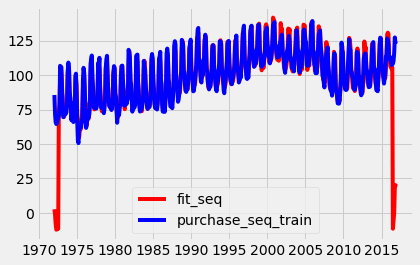

<Figure size 1440x2160 with 0 Axes>

In [19]:
# 趋势序列模型训练
trend_model = ARIMA_Model(trend, (8, 1, 1))
trend_fit_seq = trend_model.fittedvalues
trend_predict_seq = trend_model.predict(start='2017-01-01', end='2018-12-01', dynamic=True)
print(trend_predict_seq)

# 残差序列模型训练
residual_model = ARIMA_Model(residual, (1, 0, 1))
residual_fit_seq = residual_model.fittedvalues
residual_predict_seq = residual_model.predict(start='2017-01-01', end='2018-12-01', dynamic=True)
print(residual_predict_seq)

# 拟合训练集
fit_seq = pd.Series(seasonal['value'], index=seasonal.index)
fit_seq = fit_seq.add(trend_fit_seq, fill_value=0)
fit_seq = fit_seq.add(residual_fit_seq, fill_value=0)

plt.plot(fit_seq, color='red', label='fit_seq')
plt.plot(candy_train, color='blue', label='purchase_seq_train')
plt.legend(loc='best')

plt.figure(figsize=(20, 30))
plt.show()

                value
date                 
2007-01-01   2.621998
2007-02-01  -1.318423
2007-03-01  -7.855382
2007-04-01 -12.195203
2007-05-01 -11.950384
2007-06-01 -10.101225
2007-07-01 -11.474037
2007-08-01  -5.364344
2007-09-01   0.055250
2007-10-01  18.023474
2007-11-01  20.185162
2007-12-01  19.373115
2008-01-01   2.621998
2008-02-01  -1.318423
2008-03-01  -7.855382
2008-04-01 -12.195203
2008-05-01 -11.950384
2008-06-01 -10.101225
2008-07-01 -11.474037
2008-08-01  -5.364344
2008-09-01   0.055250
2008-10-01  18.023474
2008-11-01  20.185162
2008-12-01  19.373115
                value
2017-01-01   2.621998
2017-02-01  -1.318423
2017-03-01  -7.855382
2017-04-01 -12.195203
2017-05-01 -11.950384
2017-06-01 -10.101225
2017-07-01 -11.474037
2017-08-01  -5.364344
2017-09-01   0.055250
2017-10-01  18.023474
2017-11-01  20.185162
2017-12-01  19.373115
2018-01-01   2.621998
2018-02-01  -1.318423
2018-03-01  -7.855382
2018-04-01 -12.195203
2018-05-01 -11.950384
2018-06-01 -10.101225
2018-07-01

/var/folders/bk/b3m2wys54n91zrkcrlln8fpr0000gn/T/ipykernel_53118/2048420241.py:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01']).apply(lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d'))


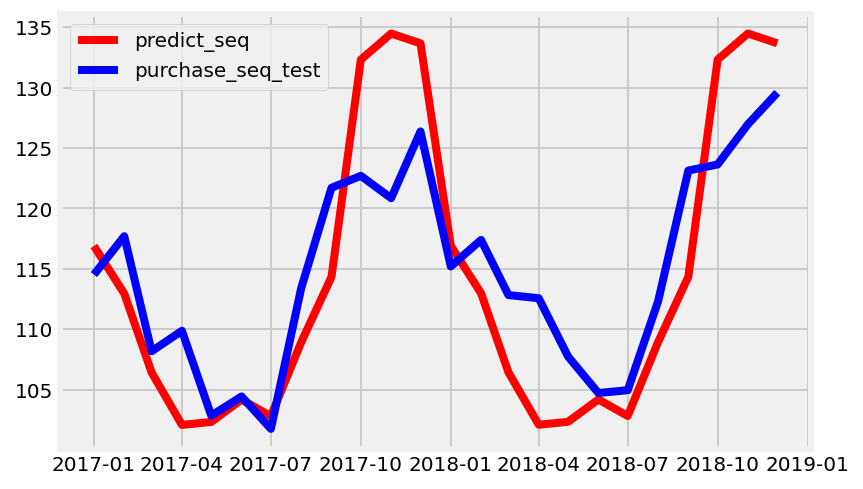

In [20]:
# 预测测试集
## 输出高清图像
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

seasonal_predict_seq = seasonal['2007-01-01':'2008-12-01']
print(seasonal_predict_seq)

predict_dates = pd.Series(
    ['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01', '2017-06-01', 
     '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
     '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', 
     '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01']).apply(lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d'))
seasonal_predict_seq.index = predict_dates
print(seasonal_predict_seq)

# 

predict_seq = pd.Series(seasonal_predict_seq['value'], index=seasonal_predict_seq.index)
predict_seq = predict_seq.add(trend_predict_seq, fill_value=0)
predict_seq = predict_seq.add(residual_predict_seq, fill_value=0)

plt.plot(predict_seq, color='red', label='predict_seq')
plt.plot(candy_test, color='blue', label='purchase_seq_test')
plt.legend(loc='best')
plt.show()